In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import cv2
import os

In [2]:
# Dataset paths (update BASE_DIR as needed)
BASE_DIR = r"C:\Users\vivek\OneDrive\Desktop\DL Lab\assignment_3\Hindi-MNIST"
TRAIN_DIR = os.path.join(BASE_DIR, "train")
TEST_DIR = os.path.join(BASE_DIR, "test")
CATEGORIES = [str(i) for i in range(10)]  # Hindi digits 0-9
IMG_SIZE = 28
CHANNELS = 1
NUM_CLASSES = len(CATEGORIES)

In [3]:
def load_data(data_dir):
    images = []
    labels = []
    for category in CATEGORIES:
        label = int(category)
        folder = os.path.join(data_dir, category)
        for fname in os.listdir(folder):
            path = os.path.join(folder, fname)
            img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
                images.append(img)
                labels.append(label)
    images = np.array(images, dtype=np.float32)
    labels = np.array(labels, dtype=np.int32)
    # Normalize and reshape
    images = images / 255.0
    images = images.reshape(-1, IMG_SIZE, IMG_SIZE, CHANNELS)
    labels = to_categorical(labels, NUM_CLASSES)
    return images, labels

In [4]:
# Load data
X_train, y_train = load_data(TRAIN_DIR)
X_test, y_test = load_data(TEST_DIR)

In [5]:
# Model definition
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, CHANNELS)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(NUM_CLASSES, activation='softmax')
])

c:\Users\vivek\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Compile
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
# Train
history = model.fit(
    X_train, y_train,
    epochs=15,
    batch_size=32,
    validation_data=(X_test, y_test)
)

Epoch 1/15
532/532 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.8328 - loss: 0.5454 - val_accuracy: 0.9820 - val_loss: 0.0633
Epoch 2/15
532/532 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.9859 - loss: 0.0508 - val_accuracy: 0.9890 - val_loss: 0.0360
Epoch 3/15
532/532 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9906 - loss: 0.0280 - val_accuracy: 0.9897 - val_loss: 0.0329
Epoch 4/15
532/532 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.9951 - loss: 0.0165 - val_accuracy: 0.9913 - val_loss: 0.0335
Epoch 5/15
532/532 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.9958 - loss: 0.0108 - val_accuracy: 0.9890 - val_loss: 0.0402
Epoch 6/15
532/532 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.9968 - loss: 0.0097 - val_accuracy: 0.9940 - val_loss: 0.0249
Epoch 7/15
532/532 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.9990 - loss: 0.0034 - val_accuracy: 0.9940 - val_loss: 0.0313
Epoch 8/15
532/532 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.9994 - loss: 0.0023 - val_a

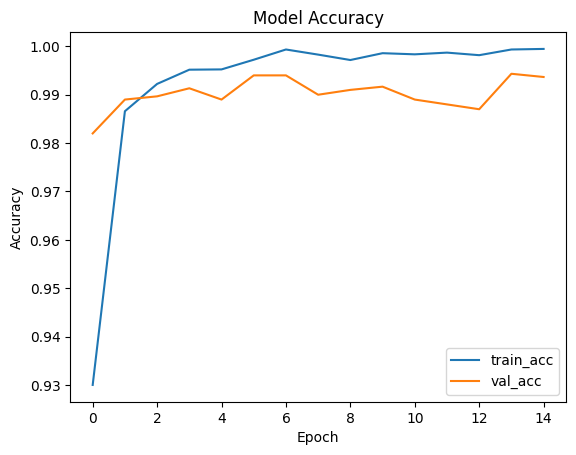

In [9]:
# Plot training history
plt.figure()
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

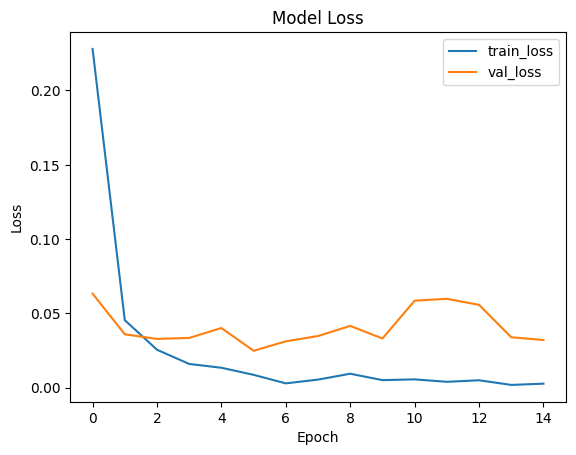

In [10]:
plt.figure()
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [11]:
# Evaluate
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc:.4f}")

94/94 - 0s - 5ms/step - accuracy: 0.9937 - loss: 0.0321
Test Accuracy: 0.9937


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


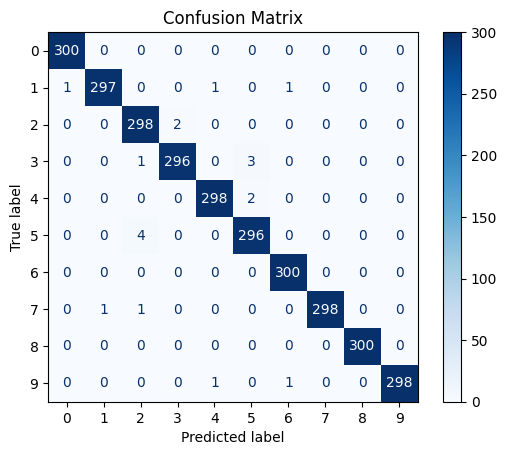

In [12]:
# Confusion Matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=CATEGORIES)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


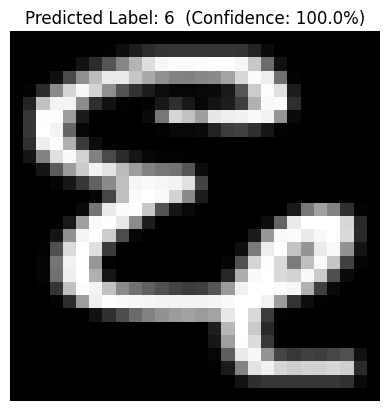

In [14]:
# Testing the model with a new image
image_path = r"C:\Users\vivek\OneDrive\Desktop\DL Lab\assignment_3\test_image.png"

# 1. Load the image in grayscale
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# 2. Resize to 28×28 (same as training)
img_resized = cv2.resize(img, (28, 28))

# 3. Normalize pixel values to [0,1]
img_normalized = img_resized.astype(np.float32) / 255.0

# 4. Reshape to match model input shape: (1, 28, 28, 1)
img_input = img_normalized.reshape(1, 28, 28, 1)

# 5. Predict using the model
prediction = model.predict(img_input)       # shape: (1, 10)
predicted_label = np.argmax(prediction[0])  # integer 0–9
confidence = prediction[0, predicted_label]

# 6. Display the image and the prediction
plt.imshow(img_resized, cmap='gray')
plt.title(f"Predicted Label: {predicted_label}  (Confidence: {confidence*100:.1f}%)")
plt.axis('off')
plt.show()